# Del 08: Strojno učenje: Klasifikacija    

In [1]:
from sklearn import datasets
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

plt.style.use('ggplot')

## KNN Classification

### How does the KNN algorithm work?

<img src="http://res.cloudinary.com/dyd911kmh/image/upload/f_auto,q_auto:best/v1531424125/Knn_k1_z96jba.png">

<img src="http://res.cloudinary.com/dyd911kmh/image/upload/f_auto,q_auto:best/v1531424125/KNN_final1_ibdm8a.png">

### Eager Vs. Lazy Learners

### Curse of Dimensionality

### How do you decide the number of neighbors in KNN?

<img src="http://res.cloudinary.com/dyd911kmh/image/upload/f_auto,q_auto:best/v1531424125/KNN_final_a1mrv9.png">

- majhen k => nizek bias, visoka varianca -> overfitting
- velik k => visok bias, nizka varianca -> underfitting

In [2]:
#! pip install mlxtend

In [31]:
from class_algs import knn_comparison

data1 = pd.read_csv('data/ushape.csv')
for i in [1,5,20,30,40,80]:
    knn_comparison(data1, i)

ImportError: cannot import name 'knn_comparison' from 'class_algs' (/home/niko/analitika-podatkov-2/working_directory/08_Strojno_ucenje_klasifikacija/class_algs.py)

Nujno podatke skaliramo(normaliziramo), 0-1

### Primer: Iris dataset

In [ ]:
# Naložimo dataset
iris = datasets.load_iris()
type(iris)

In [ ]:
print(iris.keys())

In [ ]:
type(iris.data), type(iris.target)

In [ ]:
iris.data.shape

In [ ]:
iris.target_names

In [ ]:
X = iris.data
y = iris.target
df = pd.DataFrame(X, columns=iris.feature_names)
df.head()

In [ ]:
_ = pd.plotting.scatter_matrix(df, c=y, figsize = [8, 8], s=150, marker = 'D')
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split

# Create arrays for the features and the response variable
y = iris.target
X = df.values

In [ ]:
# Split into training and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=11)

In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
# Import KNeighborsClassifier from sklearn.neighbors
from sklearn.neighbors import KNeighborsClassifier

# Create a k-NN classifier with 7 neighbors
knn = KNeighborsClassifier(n_neighbors=7)

In [ ]:
# Fit the classifier to the data
knn.fit(X_train_scaled, y_train)

In [ ]:
# Print the accuracy # TEST
print(knn.score(X_test_scaled, y_test))

In [ ]:
# Print the accuracy # TRAIN
print(knn.score(X_train_scaled, y_train))

In [ ]:
# Predict the labels for the training data X
predict = knn.predict(X_test_scaled)

predict

In [ ]:
from sklearn.metrics import accuracy_score
# evaluate accuracy
print(accuracy_score(y_test, predict))

In [ ]:
# Setup arrays to store train and test accuracies
neighbors = np.arange(1, 20)
train_accuracy = np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))

# Loop over different values of k
for i, k in enumerate(neighbors):
    # Setup a k-NN Classifier with k neighbors: knn
    knn = KNeighborsClassifier(n_neighbors=k)

    # Fit the classifier to the training data
    knn.fit(X_train_scaled, y_train)
    
    #Compute accuracy on the training set
    train_accuracy[i] = knn.score(X_train_scaled, y_train)

    #Compute accuracy on the testing set
    test_accuracy[i] = knn.score(X_test_scaled, y_test)

# Generate plot
plt.title('k-NN: Varying Number of Neighbors')
plt.plot(neighbors, test_accuracy, label = 'Testing Accuracy')
plt.plot(neighbors, train_accuracy, label = 'Training Accuracy')
plt.legend()
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.show()

In [ ]:
train_proportion = [0.8, 0.7, 0.6, 0.5, 0.4, 0.3, 0.2]

knn = KNeighborsClassifier(n_neighbors = 6)

plt.figure()

for s in train_proportion:
    scores = []
    for i in range(1,1000):
        Xn_train, Xn_test, yn_train, yn_test = train_test_split(X, y, test_size = 1-s)
        
        scaler = MinMaxScaler()
        X_train_scaled = scaler.fit_transform(Xn_train)

        scaler = MinMaxScaler()
        X_test_scaled = scaler.fit_transform(Xn_test)
        
        knn.fit(X_train_scaled, yn_train)
        scores.append(knn.score(X_test_scaled, yn_test))   
    plt.plot(s, np.mean(scores), 'bo')

plt.xlabel('Training set proportion (%)')
plt.ylabel('accuracy')
plt.show()

## Primerjava klasifikacijskih modelov

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

In [ ]:
from class_algs import plot_classifier, plot_contours, make_meshgrid, X, y

In [ ]:
def plot_4_classifiers(X, y, clfs):
    # Set-up 2x2 grid for plotting.
    fig, sub = plt.subplots(2, 2)
    plt.subplots_adjust(wspace=0.2, hspace=0.2)
    for clf, ax, title in zip(clfs, sub.flatten(), ("LogisticRegression", "SVC", "GaussianNB", "KNeighborsClassifier")):
        clf.fit(X, y)
        plot_classifier(X, y, clf, ax, ticks=True)
        ax.set_title(title)
    plt.show()

In [ ]:
# Define the classifiers
classifiers = [LogisticRegression(), SVC(kernel='rbf', C=1E6), GaussianNB(), KNeighborsClassifier()]

In [ ]:
# Fit the classifiers
for c in classifiers:
    c.fit(X,y)

# Plot the classifiers
plot_4_classifiers(X, y, classifiers)
plt.show()

### Performance Evaluation Metrics

Performance evaluation metrics are based on the total number of the following variables:
- `True Positives`: outcome correctly predicted as positive class
- `True Negatives`: outcome correctly predicted as negative class
- `False Positives`: outcome incorrectly predicted as positive class
- `False Negatives`: outcome incorrectly predicted as negative class

<img alt="Image for post" class="yi yj dq hq dr hr v c" width="459" height="252" src="https://miro.medium.com/max/459/1*hn73Xm_aTkXLP6BDS4AOWw.png" srcset="https://miro.medium.com/max/276/1*hn73Xm_aTkXLP6BDS4AOWw.png 276w, https://miro.medium.com/max/459/1*hn73Xm_aTkXLP6BDS4AOWw.png 459w" sizes="459px">

- **Accuracy**: test’s ability to correctly predict both classes
- **Precision**: test’s ability to correctly detect positive classes from all predicted positive classes
- **Recall (Sensitivity)**: test’s ability to correctly detect positive classes from all actual positive classes
- **F1 Score**: harmonic mean of precision and recall

<img alt="Image for post" class="yi yj dq hq dr hr v c" width="821" height="325" src="https://miro.medium.com/max/821/1*Ga4hz2DY2dcWLR22YDN3Yw.png" srcset="https://miro.medium.com/max/276/1*Ga4hz2DY2dcWLR22YDN3Yw.png 276w, https://miro.medium.com/max/552/1*Ga4hz2DY2dcWLR22YDN3Yw.png 552w, https://miro.medium.com/max/640/1*Ga4hz2DY2dcWLR22YDN3Yw.png 640w, https://miro.medium.com/max/700/1*Ga4hz2DY2dcWLR22YDN3Yw.png 700w" sizes="700px">

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
# Set random seed
np.random.seed(42)

# Load csv file
df = pd.read_csv('data/framingham.csv')

# View top 5 rows
df.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [7]:
df.shape

(4240, 16)

###  Exploratory Data Analysis

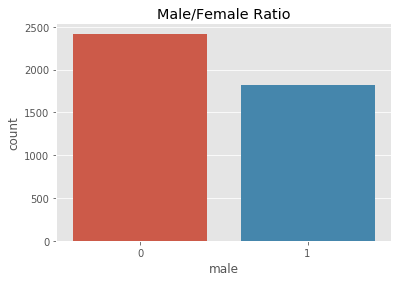

In [8]:
sns.countplot(x=df["male"]).set_title("Male/Female Ratio")
plt.show()

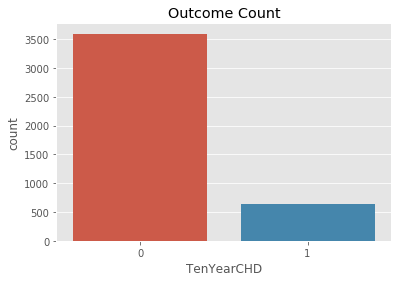

In [9]:
sns.countplot(x=df["TenYearCHD"]).set_title("Outcome Count")
plt.show()

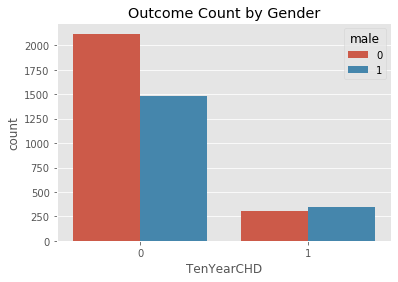

In [10]:
sns.countplot(x="TenYearCHD", hue="male", data=df).set_title('Outcome Count by Gender')
plt.show()

### Data Cleaning

In [11]:
df.isnull().values.any()

True

In [12]:
df.isnull().sum()

male                 0
age                  0
education          105
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD           0
dtype: int64

In [13]:
df = df.dropna()

In [14]:
df.isnull().values.any()

False

### Data Balancing

In [15]:
#!pip install imbalanced-learn

In [16]:
X = df.drop(columns="TenYearCHD", axis=0)

In [17]:
y = df["TenYearCHD"]

In [18]:
from imblearn.under_sampling import RandomUnderSampler

In [19]:
rus = RandomUnderSampler(random_state=42)

In [20]:
df_data, df_target = rus.fit_resample(X, y)

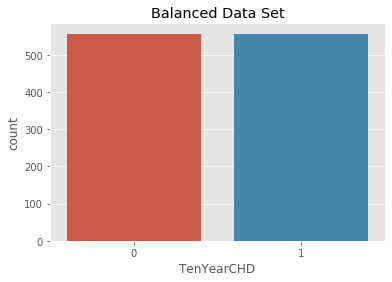

In [21]:
sns.countplot(x=df_target).set_title('Balanced Data Set')
plt.show()

In [22]:
from sklearn.preprocessing import MinMaxScaler

mms = MinMaxScaler()
df_data = mms.fit_transform(df_data)

In [23]:
df_data[:5]

array([[0.        , 0.34285714, 0.33333333, 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.30672269,
        0.1820331 , 0.2962963 , 0.13197845, 0.32258065, 0.13559322],
       [1.        , 0.54285714, 0.        , 1.        , 0.66666667,
        0.        , 0.        , 0.        , 0.        , 0.22689076,
        0.24822695, 0.26455026, 0.15426053, 0.27956989, 0.09322034],
       [0.        , 0.08571429, 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.17647059,
        0.16548463, 0.23280423, 0.22355534, 0.24731183, 0.12711864],
       [0.        , 0.31428571, 0.        , 1.        , 0.16666667,
        0.        , 0.        , 0.        , 0.        , 0.22268908,
        0.1536643 , 0.28571429, 0.13197845, 0.48387097, 0.10451977],
       [1.        , 0.34285714, 0.        , 1.        , 0.08333333,
        0.        , 0.        , 0.        , 0.        , 0.20378151,
        0.19621749, 0.42328042, 0.21669931, 

### Models Building and Performance Evaluation

In [24]:
from sklearn.metrics import make_scorer
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.model_selection import cross_validate

In [25]:
scoring = {'accuracy':make_scorer(accuracy_score), 
           'precision':make_scorer(precision_score),
           'recall':make_scorer(recall_score), 
           'f1_score':make_scorer(f1_score)}

In [26]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

In [27]:
log_model = LogisticRegression(max_iter=10000)
svc_model = LinearSVC(dual=False)
knc_model = KNeighborsClassifier(n_neighbors=5)
gnb_model = GaussianNB()

In [28]:
def models_evaluation(X, y, folds):    
    log = cross_validate(log_model, X, y, cv=folds, scoring=scoring)
    svc = cross_validate(svc_model, X, y, cv=folds, scoring=scoring)
    knc = cross_validate(knc_model, X, y, cv=folds, scoring=scoring)
    gnb = cross_validate(gnb_model, X, y, cv=folds, scoring=scoring)

    models_scores_table = pd.DataFrame({'Logistic Regression':[log['test_accuracy'].mean(),
                                                               log['test_precision'].mean(),
                                                               log['test_recall'].mean(),
                                                               log['test_f1_score'].mean()],
                                       
                                      'Support Vector Classifier':[svc['test_accuracy'].mean(),
                                                                   svc['test_precision'].mean(),
                                                                   svc['test_recall'].mean(),
                                                                   svc['test_f1_score'].mean()],
                                       
                                      'K-Neighbors Classifier':[knc['test_accuracy'].mean(),
                                                       knc['test_precision'].mean(),
                                                       knc['test_recall'].mean(),
                                                       knc['test_f1_score'].mean()],
                                       
                                      'Gaussian Naive Bayes':[gnb['test_accuracy'].mean(),
                                                              gnb['test_precision'].mean(),
                                                              gnb['test_recall'].mean(),
                                                              gnb['test_f1_score'].mean()]},
                                      
                                      index=['Accuracy', 'Precision', 'Recall', 'F1 Score'])
    
    models_scores_table['Best Score'] = models_scores_table.idxmax(axis=1)
    
    return(models_scores_table)

In [29]:
models_evaluation(df_data, df_target, 5)

,Logistic Regression,Support Vector Classifier,K-Neighbors Classifier,Gaussian Naive Bayes,Best Score
Accuracy,0.649913,0.657977,0.579885,0.597891,Support Vector Classifier
Precision,0.647492,0.655609,0.580204,0.717736,Gaussian Naive Bayes
Recall,0.662452,0.669659,0.579778,0.323214,Support Vector Classifier
F1 Score,0.654560,0.662216,0.579896,0.441818,Support Vector Classifier
